In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import string

In [2]:
letters=string.ascii_lowercase

for business

In [3]:
business_data = [json.loads(line) for line in open('../656/business/business_a', 'r')]

most popular store's categories

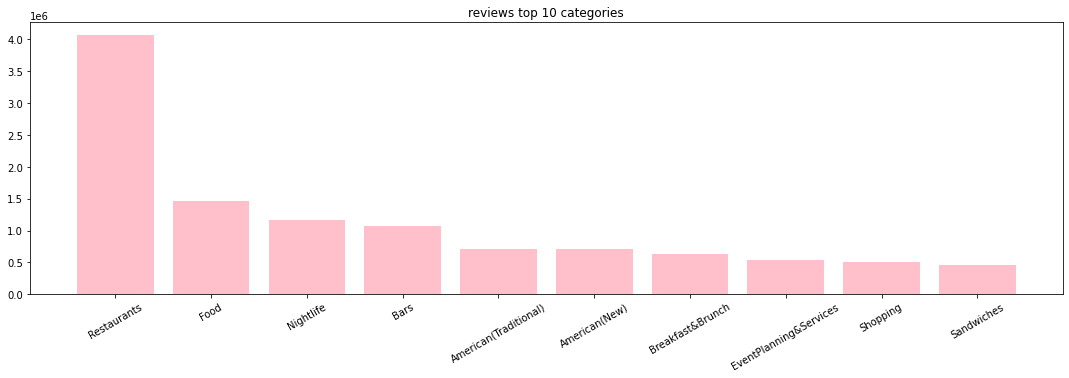

In [4]:
scores={}
for d in business_data:
    if d['categories']:
        for c in d['categories'].split(','):
            c=c.replace(' ','')
            if c in scores.keys():
                scores[c]=scores[c]+d['review_count']
            else:
                scores[c]=d['review_count']
a = sorted(scores.items(), key=lambda x: x[1])[::-1]
a=pd.DataFrame(a)
a=a[:10]
plt.bar(range(10),a[1],color='pink')
plt.xticks(range(10),a[0],rotation=30)
plt.title("reviews top 10 categories")
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
plt.show()

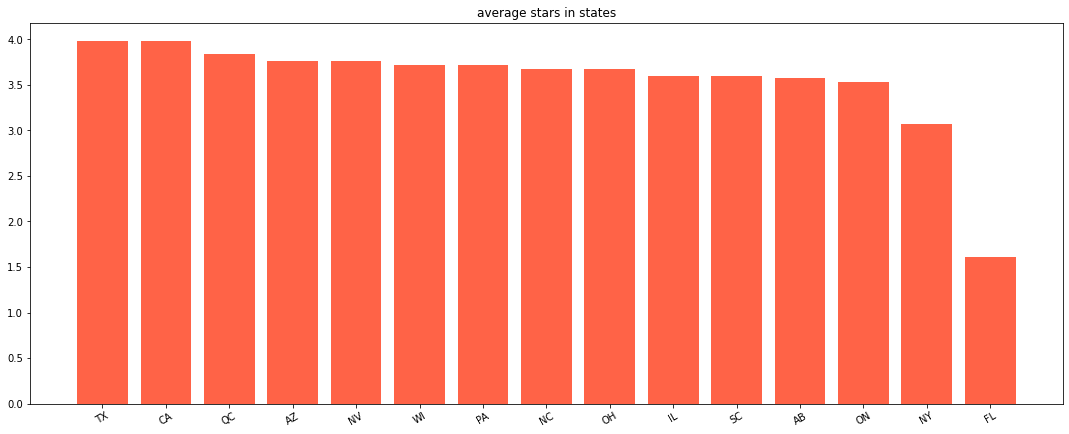

In [5]:
scores={}
reviews={}
for d in business_data:
    if d['state'] in scores.keys():
        scores[d['state']]=(scores[d['state']]*reviews[d['state']]+d['stars']*d['review_count'])/(reviews[d['state']]+d['review_count'])
        reviews[d['state']]=reviews[d['state']]+d['review_count']
    else:
        scores[d['state']]=d['stars']
        reviews[d['state']]=d['review_count']
for k,v in reviews.items():
    if v<100:
        del scores[k]
a = sorted(scores.items(), key=lambda x: x[1])[::-1]
a=pd.DataFrame(a)
plt.bar(range(len(a)),a[1],color='tomato')
plt.xticks(range(len(a)),a[0],rotation=30)
plt.title("average stars in states")
fig = plt.gcf()
fig.set_size_inches(18.5, 7)
plt.show()

for users

In [6]:
user_data=[]
for l in letters:
    try:
        user_data.extend([json.loads(line) for line in open('../656/user/user_'+l, 'r')])
    except:
        break

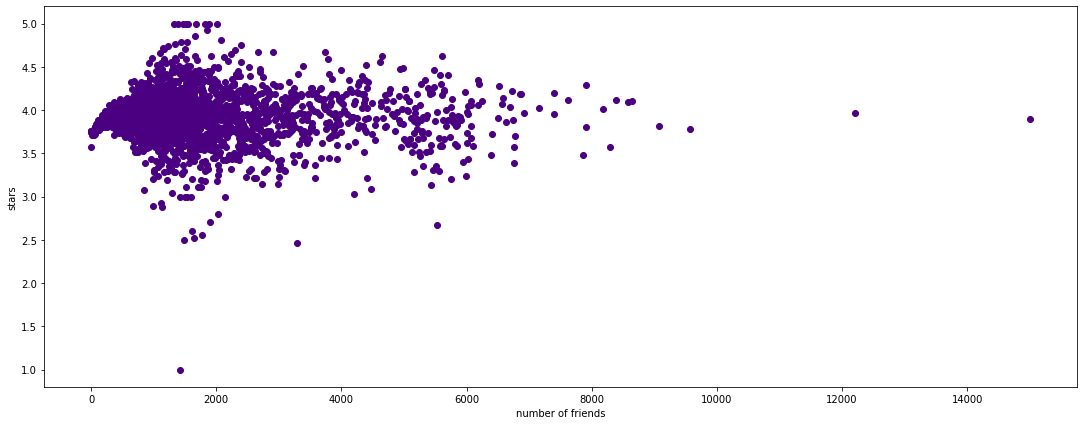

In [7]:
friend_and_star={}
num={}
for d in user_data:
    friend_num=len(d['friends'].split(','))
    if friend_num in friend_and_star.keys():
        friend_and_star[friend_num]=(friend_and_star[friend_num]*num[friend_num]+d['average_stars'])/float(num[friend_num]+1)
        num[friend_num]=num[friend_num]+1
    else:
        friend_and_star[friend_num]=d['average_stars']
        num[friend_num]=1
plt.scatter(list(friend_and_star.keys()),list(friend_and_star.values()),color='indigo')
fig = plt.gcf()
fig.set_size_inches(18.5, 7)
plt.xlabel('number of friends')
plt.ylabel('stars')
plt.show()

In [8]:
review_data=[json.loads(line) for line in open('../656/review/review_aa', 'r')]

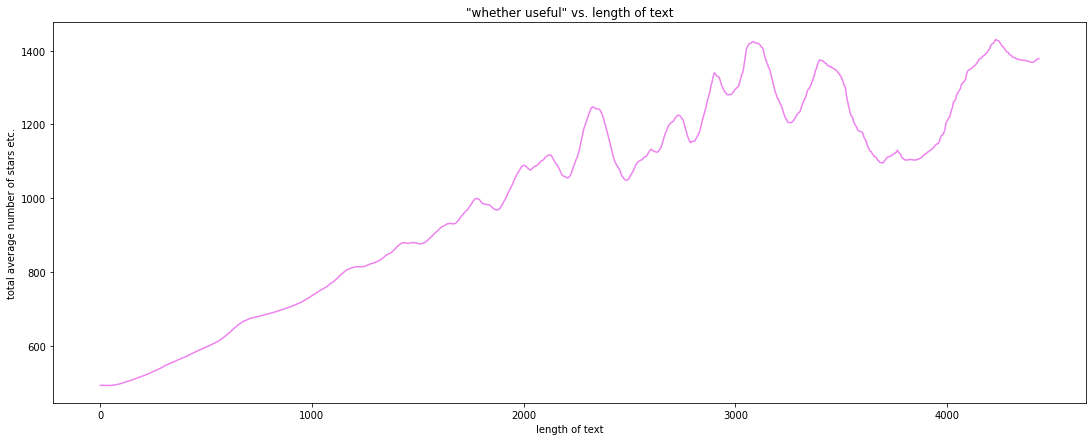

In [9]:
star={}
num={}
for d in review_data:
    text_len = len(d['text'])
    count = d['stars']+d['useful']+d['funny']+d['cool']
    if text_len in star.keys():
        star[text_len]=(star[text_len]*num[text_len]+count)/float(num[text_len]+1)
        num[text_len]=num[text_len]+1
    else:
        star[text_len]=count
        num[text_len]=1
a = sorted(star.items(), key=lambda x: x[0])[::-1]
a=pd.DataFrame(a)
a[1]=a[1].rolling(200, win_type='triang').sum()
plt.plot(a[0],a[1],color='violet')
fig = plt.gcf()
fig.set_size_inches(18.5, 7)
plt.xlabel('length of text')
plt.ylabel('total average number of stars etc.')
plt.title('"whether useful" vs. length of text')
plt.show()

In [10]:
review_data_pd=pd.DataFrame(review_data)
text_and_star=review_data_pd[['stars','text']]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(text_and_star['text'], text_and_star['stars'])
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000, decode_error="ignore")
vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
cls = MultinomialNB()
cls.fit(vectorizer.transform(X_train), y_train)
y_pred = cls.predict(vectorizer.transform(X_test))


In [12]:
m=confusion_matrix(y_test, y_pred)
m1=[[] for i in range(5)]
for i in range(5):
    s=0
    for k in range(5):
        s=s+m[i][k]
    for j in range(5):
        m1[i].append(float(m[i][j]/float(s)))

Text(0.5, 1.0, 'predict accuracy using MultinomialNB model')

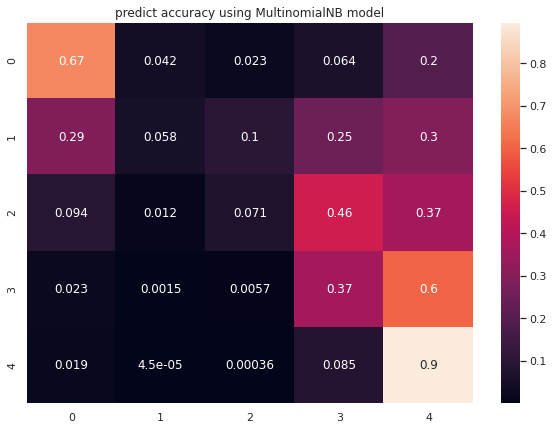

In [13]:
import seaborn as sns; sns.set()
m1=pd.DataFrame(m1)
fig = plt.gcf()
fig.set_size_inches(10, 7)
ax = sns.heatmap(m1, annot=True)
plt.title('predict accuracy using MultinomialNB model')